### Python's requests package
Python's requests package allow you to perform HTTP requests. 

In [276]:
import requests 
from requests.exceptions import RequestException

#### 1. Perform HTTP Request

We will begin by creating a "url" variable that contains the URL of the webpage we want to retrieve data from. We can then use the "get" method, which performs the HTTP requests and returns a requests.Response Python object.

In [316]:
url = 'http://composingprograms.com/shakespeare.txt' 
r = requests.get(url) 
print(type(r))

<class 'requests.models.Response'>


The "text" method returns the text content of the webpage.

In [317]:
# requests.text contains the HTTP response content body
text = r.text
print(text[:200])

A MIDSUMMER-NIGHT'S DREAM

Now , fair Hippolyta , our nuptial hour 
Draws on apace : four happy days bring in 
Another moon ; but O ! methinks how slow 
This old moon wanes ; she lingers my desires ,



In [319]:
# access the response body as bytes (returns binary data)
r.content[:200] 

b"A MIDSUMMER-NIGHT'S DREAM\n\nNow , fair Hippolyta , our nuptial hour \nDraws on apace : four happy days bring in \nAnother moon ; but O ! methinks how slow \nThis old moon wanes ; she lingers my desires ,\n"

Methods to access the details of the HTTP requests are also provided.

In [279]:
# The request information is saved as a Python object in r.request: 
print(r.request)

<PreparedRequest [GET]>


In [311]:
# What were the HTTP request headers? 
request_headers = r.request.headers
print(request_headers)

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'B=c90bim1f65cdl&b=3&s=ba'}


In [321]:
request_headers['User-Agent']

'python-requests/2.22.0'

Other methods allow more information on the HTTP request response such as status code, status message, reponse headers, etc. 

In [322]:
# Which HTTP status code did we get back from the server? 
print(r.status_code) 

200


In [339]:
# If the response was successful, no Exception will be raised
# otherwise HTTPError will be raised for certain status codes
r.raise_for_status()

If we made a bad request, the above method will return code like 404 or 405 which will raise an http error.

HTTP response codes indicate whether a specific HTTP request has been sucessfully completed. Responses are grouped in five classes and error codes in each class have their own meaning. For more information on status codes, visit https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [285]:
# What is the textual status code? 
print(r.reason) 

OK


In [286]:
# What were the HTTP response headers? 
print(r.headers)

{'Date': 'Fri, 06 Mar 2020 19:53:06 GMT', 'Expires': 'Fri, 06 Mar 2020 20:03:06 GMT', 'ETag': '"C1OlIA"', 'X-Cloud-Trace-Context': '040af29d586e195fe2dd80657de2f154', 'Content-Type': 'text/plain', 'Content-Encoding': 'gzip', 'Server': 'Google Frontend', 'Age': '44', 'Cache-Control': 'public, max-age=600', 'Transfer-Encoding': 'chunked'}


#### 2. Working with URLs with Parameters

Urls may contain "query string" that is meant to contain data that does not fit within a URL's normal hierarchical path structure. 

In [341]:
url = 'https://finance.yahoo.com/quote/%5EGSPC/history'
parameters = {'period1':1551648546,
              'period2':1583270946,
              'interval':'1d',
              'filter':'history',
              'frequency':'1d'
             }

# perform HTTP GET request
r = requests.get(url, params=parameters) 

# The HTTP response content: 
print(r.url)
print(r.text)

https://finance.yahoo.com/quote/%5EGSPC/history?period1=1551648546&period2=1583270946&interval=1d&filter=history&frequency=1d
<!DOCTYPE html><html id="atomic" class="NoJs featurephone" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>S&amp;P 500 (^GSPC) Historical Data - Yahoo Finance</title><meta name="keywords" content="^GSPC, S&amp;P 500, ^GSPC historical prices, S&amp;P 500 historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="90376669494"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Get historical data for the S&amp;P 500 (^GSPC) on Yahoo Finance. View and download daily, weekly or monthly dat

In recent years, most web frameworks will allow us to define "nice looking" URLs that just include the parameters in the path of a URL, for example, "/product/307/" instead of "products.html?p=307". Hence, there might be dynamic parts in the URL to which the server might respond in different ways.


In some circumstances, requests will try to help you out and encode some characters for you:

In [293]:
import requests
url = 'https://finance.yahoo.com/quote/' + ' ^GSPC '
r = requests.get(url)  
print(r.url)
r.text

https://finance.yahoo.com/lookup?s=%20%5EGSPC


'<!DOCTYPE html><html id="atomic" class="NoJs featurephone" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>Symbol Lookup from Yahoo Finance</title><meta name="keywords" content="symbol lookup, ticker lookup, stock symbol lookup"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="90376669494"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Search for ticker symbols for Stocks, Mutual Funds, ETFs, Indices and Futures on Yahoo! Finance."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvalidate.01" content="A9862C0E6E1BE95BCE0BF3D0298FD58B"/><link rel="manifest" href="/manifest.json"/><link rel="dns-prefetch" href="//l.yimg.com"/><

#### 4. Timeout

WHen making requests to an external server, your system will need to wait upon the reponse before moving on. By default, requests will wait indefinitely on the response. So, you should almost always specify a timeout duration. You can use timeout parameter to do so. 

In [361]:
import requests
url = 'https://finance.yahoo.com/quote/' + ' ^GSPC '
r = requests.get(url, timeout=1)  
r

<Response [200]>

You can also submit a timeout for the time you allow to establish a connection to the server. You can pass a tuple where the first item specifies the time to connect to the server and the second item specifies the time to wait on a response once the connection is established. 

Requests also provides methods for timeout exceptions.

In [362]:
import requests
url = 'https://finance.yahoo.com/quote/' + ' ^GSPC '
r = requests.get(url, timeout=(2,5))  
r

<Response [200]>

#### 3. Authentications

You can use requests library also with APIs. Usually, API requires an authentication process before you can access it. You can provide this information in "auth" argument.

In [ ]:
from requests.auth import HTTPBasicAuth

r = requests.get('https://api.yelp.com/v3/businesses/',
#                  auth=('username','password')
                 auth=HTTPBasicAuth('TOKEN', 'ACCESS_KEY' )
                )


Normally, however, you would not just copy paste your username and password on your code. A more secure and common form of authentication for several web APIs is to use OAuth. The requests-oauthlib allows to easily make OAuth1 authenticated requests.

In order to access the yelp API using OAuth, you will need to first create an app and obtain your private API keys. 
Follow the instructions from their API documentation:
https://www.yelp.com/developers/documentation/v3/authentication

In [ ]:
from requests_oauthlib import OAuth1

url = 'https://api.yelp.com/v3/businesses/'
auth = OAuth1('YOUR_APP_KEY', 'YOUR_APP_SECRET',
              'USER_OAUTH_TOKEN', 'USER_OAUTH_TOKEN_SECRET')
requests.get(url, auth=auth)

#### 4. Getting to know json data

In [369]:
url = 'https://api.coindesk.com/v1/bpi/historical/close'
parameters = {'start':'2011-01-01',
              'end':'2019-09-05'
             }
r = requests.get(url, parameters)
if r.ok:
    data = r.json()
print(data)

{'bpi': {'2011-01-01': 0.3, '2011-01-02': 0.3, '2011-01-03': 0.295, '2011-01-04': 0.299, '2011-01-05': 0.299, '2011-01-06': 0.298, '2011-01-07': 0.32, '2011-01-08': 0.3229, '2011-01-09': 0.323, '2011-01-10': 0.3266, '2011-01-11': 0.3266, '2011-01-12': 0.3188, '2011-01-13': 0.3176, '2011-01-14': 0.4, '2011-01-15': 0.386, '2011-01-16': 0.3868, '2011-01-17': 0.3495, '2011-01-18': 0.313, '2011-01-19': 0.313, '2011-01-20': 0.39, '2011-01-21': 0.4199, '2011-01-22': 0.4443, '2011-01-23': 0.4424, '2011-01-24': 0.4199, '2011-01-25': 0.41, '2011-01-26': 0.417, '2011-01-27': 0.4212, '2011-01-28': 0.446, '2011-01-29': 0.439, '2011-01-30': 0.4799, '2011-01-31': 0.52, '2011-02-01': 0.7, '2011-02-02': 0.716, '2011-02-03': 0.69, '2011-02-04': 0.811, '2011-02-05': 0.92, '2011-02-06': 0.8997, '2011-02-07': 0.89, '2011-02-08': 0.918, '2011-02-09': 1.09, '2011-02-10': 0.9803, '2011-02-11': 1.07, '2011-02-12': 1.0799, '2011-02-13': 1.05, '2011-02-14': 1.07, '2011-02-15': 1.05, '2011-02-16': 1.045, '2011-02

In [371]:
type(data)

dict

In [374]:
data.keys()

dict_keys(['bpi', 'disclaimer', 'time'])

In [392]:
data['bpi']

{'2011-01-01': 0.3,
 '2011-01-02': 0.3,
 '2011-01-03': 0.295,
 '2011-01-04': 0.299,
 '2011-01-05': 0.299,
 '2011-01-06': 0.298,
 '2011-01-07': 0.32,
 '2011-01-08': 0.3229,
 '2011-01-09': 0.323,
 '2011-01-10': 0.3266,
 '2011-01-11': 0.3266,
 '2011-01-12': 0.3188,
 '2011-01-13': 0.3176,
 '2011-01-14': 0.4,
 '2011-01-15': 0.386,
 '2011-01-16': 0.3868,
 '2011-01-17': 0.3495,
 '2011-01-18': 0.313,
 '2011-01-19': 0.313,
 '2011-01-20': 0.39,
 '2011-01-21': 0.4199,
 '2011-01-22': 0.4443,
 '2011-01-23': 0.4424,
 '2011-01-24': 0.4199,
 '2011-01-25': 0.41,
 '2011-01-26': 0.417,
 '2011-01-27': 0.4212,
 '2011-01-28': 0.446,
 '2011-01-29': 0.439,
 '2011-01-30': 0.4799,
 '2011-01-31': 0.52,
 '2011-02-01': 0.7,
 '2011-02-02': 0.716,
 '2011-02-03': 0.69,
 '2011-02-04': 0.811,
 '2011-02-05': 0.92,
 '2011-02-06': 0.8997,
 '2011-02-07': 0.89,
 '2011-02-08': 0.918,
 '2011-02-09': 1.09,
 '2011-02-10': 0.9803,
 '2011-02-11': 1.07,
 '2011-02-12': 1.0799,
 '2011-02-13': 1.05,
 '2011-02-14': 1.07,
 '2011-02-15'

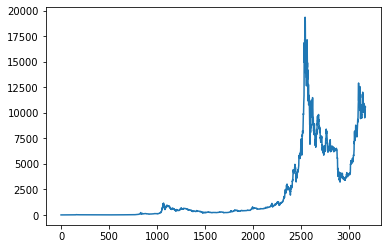

In [393]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime as dt

price = list(data['bpi'].values())
period = list(data['bpi'].keys())
date = [dt.strptime(i, '%Y-%m-%d') for i in period] 
plt.plot(price)